## 1. Сгенерировать пакетом hopfield-tracking датасет spdsim с параметрами по умолчанию

In [1]:
import vispy
# selecting sub-backend behind jupyter_rfb:
# 1) pyglfw has high priority if present
# 2) to use any other backend, install then designate as default
# 4) use jupyter_rfb, it then selects the sub-backend according to config
# 5) enable jupyterlab extensions for interactive widget provided by jupyter_rfb

# only needed in jhub2, jhub and jlab-hpc can't run opengl at all, locally auto-selected backend is OK
vispy.config.update(default_backend='egl')
vispy.use('jupyter_rfb')

RFBOutputContext()

RFBOutputContext()

CanvasBackend(css_height='768px', css_width='1024px')
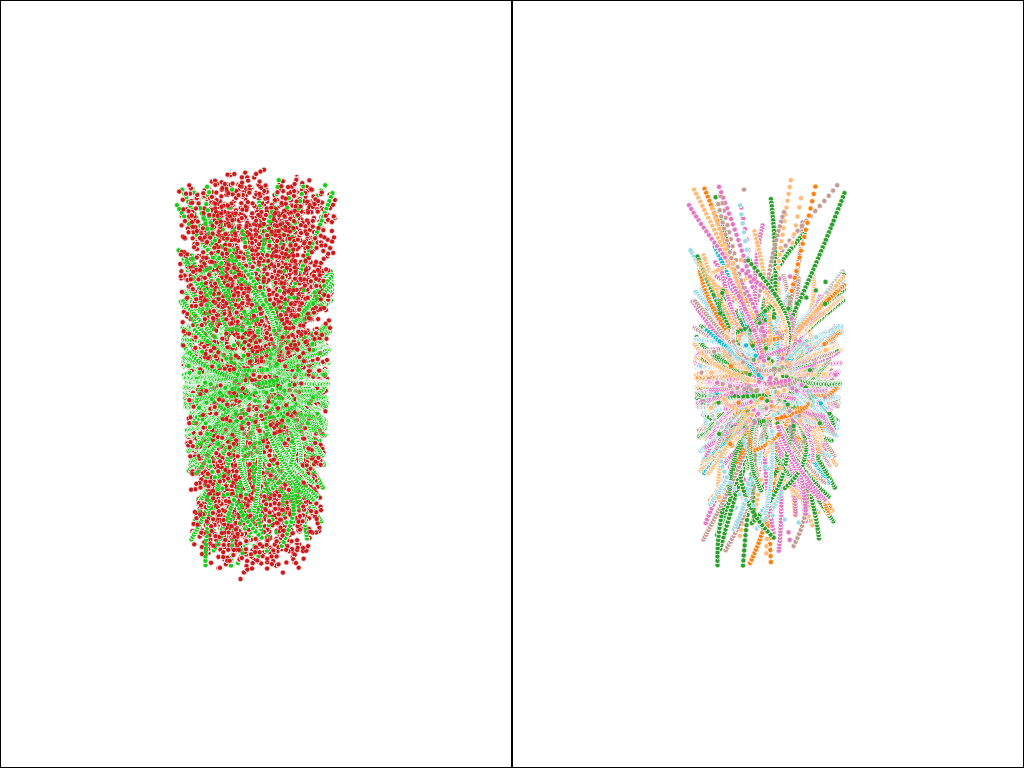

In [2]:
from segment.candidate import gen_seg_layered
from segment.track import gen_seg_track_layered, gen_seg_track_sequential
from tracking.plot import plot_event, plot_seg_diff
from vispy.scene import SceneCanvas
from datasets import get_hits

canvas = SceneCanvas(bgcolor='white', size=(1000, 1500))
grid = canvas.central_widget.add_grid()

event = get_hits('spdsim')
plot_event(event)

## 2. Взять одно событие

In [14]:
import random

selected_event = event.loc[event['event_id'] == random.randint(0, 99)]
selected_event.reset_index(drop=True, inplace=True)
selected_event

,x,y,z,layer,track,event_id
0,203.910055,176.990913,197.229863,1,0,68
1,209.682623,196.060156,199.829359,2,0,68
2,214.154029,215.930286,202.576896,3,0,68
3,217.626084,236.195357,205.266555,4,0,68
4,219.670713,257.190729,208.066421,5,0,68
...,...,...,...,...,...,...
275,-675.086060,-74.484757,-762.856869,24,-1,68
276,-2.193747,542.876814,1322.463854,16,-1,68
277,152.847725,574.152242,-346.021538,19,-1,68
278,-297.708220,193.944513,-718.366339,5,-1,68


## 3. Построить набор сегментов-кандидатов с помощью gen_seg_layered или gen_seg_all

In [46]:
from segment.candidate import gen_seg_layered, gen_seg_all
from tracking.plot import plot_event, plot_seg_diff, _seg_tseg_view

set_segments = gen_seg_layered(selected_event)

In [50]:
import pandas as pd

df_segments  = pd.DataFrame(set_segments)
df_segments

,0,1
0,246,0
1,246,35
2,246,70
3,246,105
4,246,140
...,...,...
2174,266,69
2175,266,104
2176,266,139
2177,266,174


## 4. Добавить координаты обоих хитов в признаки сегмента. (например в виде колонок x_1, y_1, z_1, x_2, y_2, z_2)

In [52]:
df_segments.rename(columns={0: 'hit1', 1: 'hit2'}, inplace=True)
df_segments

,hit0,hit1
0,246,0
1,246,35
2,246,70
3,246,105
4,246,140
...,...,...
2174,266,69
2175,266,104
2176,266,139
2177,266,174


In [53]:
df_segments = pd.concat([df_segments, pd.DataFrame(columns=['x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2'])], axis=1)
df_segments

,hit0,hit1,x_1,y_1,z_1,x_2,y_2,z_2
0,246,0,NaN,NaN,NaN,NaN,NaN,NaN
1,246,35,NaN,NaN,NaN,NaN,NaN,NaN
2,246,70,NaN,NaN,NaN,NaN,NaN,NaN
3,246,105,NaN,NaN,NaN,NaN,NaN,NaN
4,246,140,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2174,266,69,NaN,NaN,NaN,NaN,NaN,NaN
2175,266,104,NaN,NaN,NaN,NaN,NaN,NaN
2176,266,139,NaN,NaN,NaN,NaN,NaN,NaN
2177,266,174,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df_segments

,hit0,hit1,x_1,y_1,z_1,x_2,y_2,z_2
0,246,0,NaN,NaN,NaN,NaN,NaN,NaN
1,246,35,NaN,NaN,NaN,NaN,NaN,NaN
2,246,70,NaN,NaN,NaN,NaN,NaN,NaN
3,246,105,NaN,NaN,NaN,NaN,NaN,NaN
4,246,140,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2174,266,69,NaN,NaN,NaN,NaN,NaN,NaN
2175,266,104,NaN,NaN,NaN,NaN,NaN,NaN
2176,266,139,NaN,NaN,NaN,NaN,NaN,NaN
2177,266,174,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
for index, row in df_segments.iterrows():
    df_segments.at[index, 'x_1'] =  selected_event.at[row['hit1'], 'x']
    df_segments.at[index, 'x_2'] =  selected_event.at[row['hit2'], 'x']
    df_segments.at[index, 'y_1'] =  selected_event.at[row['hit1'], 'y']
    df_segments.at[index, 'y_2'] =  selected_event.at[row['hit2'], 'y']
    df_segments.at[index, 'z_1'] =  selected_event.at[row['hit1'], 'z']
    df_segments.at[index, 'z_2'] =  selected_event.at[row['hit2'], 'z']

In [79]:
df_segments

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2
0,246,0,169.601067,-210.099436,808.059514,203.910055,176.990913,197.229863
1,246,35,169.601067,-210.099436,808.059514,144.781742,-227.921005,291.620707
2,246,70,169.601067,-210.099436,808.059514,-224.450427,150.122022,-119.261418
3,246,105,169.601067,-210.099436,808.059514,-251.36689,98.651833,141.080344
4,246,140,169.601067,-210.099436,808.059514,-194.803283,186.954567,141.189742
...,...,...,...,...,...,...,...,...
2174,266,69,-843.531132,-102.99061,-1444.836909,-404.589365,-747.567018,602.760006
2175,266,104,-843.531132,-102.99061,-1444.836909,-849.216528,37.994212,-714.423104
2176,266,139,-843.531132,-102.99061,-1444.836909,-593.035177,608.94719,113.564065
2177,266,174,-843.531132,-102.99061,-1444.836909,-757.41846,385.653994,113.247525


## 5. Подготовить целевую колонку - принадлежность сегмента треку через прямое сравнение track_id, или через gen_seg_track_layered, gen_seg_track_sequential

In [80]:
df_segments = pd.concat([df_segments, pd.DataFrame(columns=['class'])], axis=1)
df_segments

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2,class
0,246,0,169.601067,-210.099436,808.059514,203.910055,176.990913,197.229863,NaN
1,246,35,169.601067,-210.099436,808.059514,144.781742,-227.921005,291.620707,NaN
2,246,70,169.601067,-210.099436,808.059514,-224.450427,150.122022,-119.261418,NaN
3,246,105,169.601067,-210.099436,808.059514,-251.36689,98.651833,141.080344,NaN
4,246,140,169.601067,-210.099436,808.059514,-194.803283,186.954567,141.189742,NaN
...,...,...,...,...,...,...,...,...,...
2174,266,69,-843.531132,-102.99061,-1444.836909,-404.589365,-747.567018,602.760006,NaN
2175,266,104,-843.531132,-102.99061,-1444.836909,-849.216528,37.994212,-714.423104,NaN
2176,266,139,-843.531132,-102.99061,-1444.836909,-593.035177,608.94719,113.564065,NaN
2177,266,174,-843.531132,-102.99061,-1444.836909,-757.41846,385.653994,113.247525,NaN


In [81]:
selected_event

,x,y,z,layer,track,event_id
0,203.910055,176.990913,197.229863,1,0,68
1,209.682623,196.060156,199.829359,2,0,68
2,214.154029,215.930286,202.576896,3,0,68
3,217.626084,236.195357,205.266555,4,0,68
4,219.670713,257.190729,208.066421,5,0,68
...,...,...,...,...,...,...
275,-675.086060,-74.484757,-762.856869,24,-1,68
276,-2.193747,542.876814,1322.463854,16,-1,68
277,152.847725,574.152242,-346.021538,19,-1,68
278,-297.708220,193.944513,-718.366339,5,-1,68


In [96]:
for index, row in df_segments.iterrows():
    # оба хита в сегменте должены принадлежать одному треку и не должены быть равны -1(шум)
    if (selected_event.at[row['hit1'], 'track'] == selected_event.at[row['hit2'], 'track']) and selected_event.at[row['hit1'], 'track']  != -1:
        df_segments.at[index, 'class'] = 1
    else: 
        df_segments.at[index, 'class'] = 0

In [97]:
df_segments

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2,class
0,246,0,169.601067,-210.099436,808.059514,203.910055,176.990913,197.229863,0
1,246,35,169.601067,-210.099436,808.059514,144.781742,-227.921005,291.620707,0
2,246,70,169.601067,-210.099436,808.059514,-224.450427,150.122022,-119.261418,0
3,246,105,169.601067,-210.099436,808.059514,-251.36689,98.651833,141.080344,0
4,246,140,169.601067,-210.099436,808.059514,-194.803283,186.954567,141.189742,0
...,...,...,...,...,...,...,...,...,...
2174,266,69,-843.531132,-102.99061,-1444.836909,-404.589365,-747.567018,602.760006,0
2175,266,104,-843.531132,-102.99061,-1444.836909,-849.216528,37.994212,-714.423104,0
2176,266,139,-843.531132,-102.99061,-1444.836909,-593.035177,608.94719,113.564065,0
2177,266,174,-843.531132,-102.99061,-1444.836909,-757.41846,385.653994,113.247525,0


In [100]:
select = df_segments.loc[df_segments['class'] == 1]
select

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2,class
7,0,1,203.910055,176.990913,197.229863,209.682623,196.060156,199.829359,1
20,35,36,144.781742,-227.921005,291.620707,146.601055,-246.849617,300.287867,1
33,70,71,-224.450427,150.122022,-119.261418,-241.032675,155.872153,-136.484624,1
46,105,106,-251.36689,98.651833,141.080344,-265.822128,108.230186,140.53183,1
59,140,141,-194.803283,186.954567,141.189742,-208.857272,196.936057,140.273929,1
...,...,...,...,...,...,...,...,...,...
2138,68,69,-371.927225,-745.198321,592.735408,-404.589365,-747.567018,602.760006,1
2145,103,104,-831.553256,50.780873,-696.533089,-849.216528,37.994212,-714.423104,1
2152,138,139,-588.867252,589.089217,114.593912,-593.035177,608.94719,113.564065,1
2159,173,174,-738.940175,384.333072,114.448673,-757.41846,385.653994,113.247525,1


## 6. Реализовать с помощью любого метода машинного обучения классификацию сегментов на трековые и не трековые, обучить на датасете

In [139]:
y_train = df_segments['class'].to_numpy()
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [102]:
df_train = df_segments.drop(['class'], axis=1)
df_train

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2
0,246,0,169.601067,-210.099436,808.059514,203.910055,176.990913,197.229863
1,246,35,169.601067,-210.099436,808.059514,144.781742,-227.921005,291.620707
2,246,70,169.601067,-210.099436,808.059514,-224.450427,150.122022,-119.261418
3,246,105,169.601067,-210.099436,808.059514,-251.36689,98.651833,141.080344
4,246,140,169.601067,-210.099436,808.059514,-194.803283,186.954567,141.189742
...,...,...,...,...,...,...,...,...
2174,266,69,-843.531132,-102.99061,-1444.836909,-404.589365,-747.567018,602.760006
2175,266,104,-843.531132,-102.99061,-1444.836909,-849.216528,37.994212,-714.423104
2176,266,139,-843.531132,-102.99061,-1444.836909,-593.035177,608.94719,113.564065
2177,266,174,-843.531132,-102.99061,-1444.836909,-757.41846,385.653994,113.247525


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hit1    2179 non-null   int64 
 1   hit2    2179 non-null   int64 
 2   x_1     2179 non-null   object
 3   y_1     2179 non-null   object
 4   z_1     2179 non-null   object
 5   x_2     2179 non-null   object
 6   y_2     2179 non-null   object
 7   z_2     2179 non-null   object
dtypes: int64(2), object(6)
memory usage: 136.3+ KB


In [108]:
df_train['x_1'] = df_train['x_1'].astype(float)
df_train['x_2'] = df_train['x_2'].astype(float)
df_train['y_1'] = df_train['y_1'].astype(float)
df_train['y_2'] = df_train['y_2'].astype(float)
df_train['z_1'] = df_train['z_1'].astype(float)
df_train['z_2'] = df_train['z_2'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit1    2179 non-null   int64  
 1   hit2    2179 non-null   int64  
 2   x_1     2179 non-null   float64
 3   y_1     2179 non-null   float64
 4   z_1     2179 non-null   float64
 5   x_2     2179 non-null   float64
 6   y_2     2179 non-null   float64
 7   z_2     2179 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 136.3 KB


In [140]:
y_train = y_train.astype(int)

In [109]:
df_train

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2
0,246,0,169.601067,-210.099436,808.059514,203.910055,176.990913,197.229863
1,246,35,169.601067,-210.099436,808.059514,144.781742,-227.921005,291.620707
2,246,70,169.601067,-210.099436,808.059514,-224.450427,150.122022,-119.261418
3,246,105,169.601067,-210.099436,808.059514,-251.366890,98.651833,141.080344
4,246,140,169.601067,-210.099436,808.059514,-194.803283,186.954567,141.189742
...,...,...,...,...,...,...,...,...
2174,266,69,-843.531132,-102.990610,-1444.836909,-404.589365,-747.567018,602.760006
2175,266,104,-843.531132,-102.990610,-1444.836909,-849.216528,37.994212,-714.423104
2176,266,139,-843.531132,-102.990610,-1444.836909,-593.035177,608.947190,113.564065
2177,266,174,-843.531132,-102.990610,-1444.836909,-757.418460,385.653994,113.247525


In [113]:
x_train = df_train.to_numpy()
x_train

array([[ 246.        ,    0.        ,  169.60106719, ...,  203.91005535,
         176.99091288,  197.22986281],
       [ 246.        ,   35.        ,  169.60106719, ...,  144.7817424 ,
        -227.92100514,  291.62070684],
       [ 246.        ,   70.        ,  169.60106719, ..., -224.45042728,
         150.12202201, -119.26141755],
       ...,
       [ 266.        ,  139.        , -843.53113228, ..., -593.03517673,
         608.94719042,  113.56406458],
       [ 266.        ,  174.        , -843.53113228, ..., -757.41846014,
         385.65399419,  113.24752541],
       [ 266.        ,  209.        , -843.53113228, ..., -532.00170604,
        -662.93307467,   80.89621481]])

### Обучение классификаторов

In [122]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train, y_train)

RandomForestClassifier()

## 7. Посчитать f1_score классификации на другом (тестовом) датасете spdsim, сгенерированном с параметрами по умолчанию

### Генерация тестового датасета

In [127]:
test_event = event.loc[event['event_id'] == random.randint(0, 99)]
test_event.reset_index(drop=True, inplace=True)
test_event

,x,y,z,layer,track,event_id
0,48.010086,265.681663,-116.235718,1,0,17
1,46.920388,283.370781,-139.000541,2,0,17
2,45.406582,300.629340,-162.351674,3,0,17
3,43.333110,318.286056,-184.931936,4,0,17
4,40.783152,335.778415,-208.156706,5,0,17
...,...,...,...,...,...,...
199,744.897598,-288.330740,-2236.856418,31,-1,17
200,-1.661803,-389.369769,1861.199302,7,-1,17
201,-501.052656,-349.985463,-2258.815823,20,-1,17
202,-442.959722,-421.101558,-2252.043826,20,-1,17


In [129]:
test_segments = gen_seg_layered(test_event)
df_test_segments  = pd.DataFrame(test_segments)
df_test_segments.rename(columns={0: 'hit1', 1: 'hit2'}, inplace=True)
df_test_segments

,hit1,hit2
0,162,0
1,162,35
2,162,70
3,162,105
4,0,1
...,...,...
1159,153,139
1160,163,34
1161,163,69
1162,163,104


In [130]:
df_test_segments = pd.concat([df_test_segments, pd.DataFrame(columns=['x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2'])], axis=1)
df_test_segments

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2
0,162,0,NaN,NaN,NaN,NaN,NaN,NaN
1,162,35,NaN,NaN,NaN,NaN,NaN,NaN
2,162,70,NaN,NaN,NaN,NaN,NaN,NaN
3,162,105,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1159,153,139,NaN,NaN,NaN,NaN,NaN,NaN
1160,163,34,NaN,NaN,NaN,NaN,NaN,NaN
1161,163,69,NaN,NaN,NaN,NaN,NaN,NaN
1162,163,104,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
for index, row in df_test_segments.iterrows():
    df_test_segments.at[index, 'x_1'] =  test_event.at[row['hit1'], 'x']
    df_test_segments.at[index, 'x_2'] =  test_event.at[row['hit2'], 'x']
    df_test_segments.at[index, 'y_1'] =  test_event.at[row['hit1'], 'y']
    df_test_segments.at[index, 'y_2'] =  test_event.at[row['hit2'], 'y']
    df_test_segments.at[index, 'z_1'] =  test_event.at[row['hit1'], 'z']
    df_test_segments.at[index, 'z_2'] =  test_event.at[row['hit2'], 'z']

In [132]:
df_test_segments

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2
0,162,0,175.62883,205.066258,730.017684,48.010086,265.681663,-116.235718
1,162,35,175.62883,205.066258,730.017684,228.418353,-144.090093,309.714013
2,162,70,175.62883,205.066258,730.017684,-154.278855,221.566775,339.327956
3,162,105,175.62883,205.066258,730.017684,246.024613,111.160903,-270.256743
4,0,1,48.010086,265.681663,-116.235718,46.920388,283.370781,-139.000541
...,...,...,...,...,...,...,...,...
1159,153,139,127.226578,840.556182,-1442.873687,536.339659,659.36684,-1391.70785
1160,163,34,712.193415,464.064961,2259.856596,-265.655424,807.260229,-904.638365
1161,163,69,712.193415,464.064961,2259.856596,837.154282,-146.328443,446.478006
1162,163,104,712.193415,464.064961,2259.856596,-662.892753,532.111539,539.738985


In [133]:
for index, row in df_test_segments.iterrows():
    # оба хита в сегменте должены принадлежать одному треку и не должены быть равны -1(шум)
    if (test_event.at[row['hit1'], 'track'] == test_event.at[row['hit2'], 'track']) and test_event.at[row['hit1'], 'track']  != -1:
        df_test_segments.at[index, 'class'] = 1
    else: 
        df_test_segments.at[index, 'class'] = 0

In [134]:
select = df_test_segments.loc[df_test_segments['class'] == 1]
select

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2,class
4,0,1,48.010086,265.681663,-116.235718,46.920388,283.370781,-139.000541,1.0
10,35,36,228.418353,-144.090093,309.714013,244.389878,-150.535751,313.707286,1.0
16,70,71,-154.278855,221.566775,339.327956,-166.025087,234.14173,345.119283,1.0
22,105,106,246.024613,111.160903,-270.256743,259.916882,121.726831,-302.936576,1.0
24,1,2,46.920388,283.370781,-139.000541,45.406582,300.62934,-162.351674,1.0
...,...,...,...,...,...,...,...,...,...
1125,137,138,532.009215,618.555587,-1325.151441,534.253333,639.056543,-1358.414118,1.0
1140,33,34,-248.573536,794.840003,-880.964065,-265.655424,807.260229,-904.638365,1.0
1145,68,69,818.83823,-152.845997,442.491487,837.154282,-146.328443,446.478006,1.0
1150,103,104,-645.082448,526.96232,533.934176,-662.892753,532.111539,539.738985,1.0


In [135]:
df_test_segments['x_1'] = df_test_segments['x_1'].astype(float)
df_test_segments['x_2'] = df_test_segments['x_2'].astype(float)
df_test_segments['y_1'] = df_test_segments['y_1'].astype(float)
df_test_segments['y_2'] = df_test_segments['y_2'].astype(float)
df_test_segments['z_1'] = df_test_segments['z_1'].astype(float)
df_test_segments['z_2'] = df_test_segments['z_2'].astype(float)
df_test_segments['class'] = df_test_segments['class'].astype(int)
df_test_segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit1    1164 non-null   int64  
 1   hit2    1164 non-null   int64  
 2   x_1     1164 non-null   float64
 3   y_1     1164 non-null   float64
 4   z_1     1164 non-null   float64
 5   x_2     1164 non-null   float64
 6   y_2     1164 non-null   float64
 7   z_2     1164 non-null   float64
 8   class   1164 non-null   int32  
dtypes: float64(6), int32(1), int64(2)
memory usage: 77.4 KB


In [138]:
y_test = df_test_segments['class'].to_numpy()
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [142]:
df_test = df_test_segments.drop(['class'], axis=1)
df_test

,hit1,hit2,x_1,y_1,z_1,x_2,y_2,z_2
0,162,0,175.628830,205.066258,730.017684,48.010086,265.681663,-116.235718
1,162,35,175.628830,205.066258,730.017684,228.418353,-144.090093,309.714013
2,162,70,175.628830,205.066258,730.017684,-154.278855,221.566775,339.327956
3,162,105,175.628830,205.066258,730.017684,246.024613,111.160903,-270.256743
4,0,1,48.010086,265.681663,-116.235718,46.920388,283.370781,-139.000541
...,...,...,...,...,...,...,...,...
1159,153,139,127.226578,840.556182,-1442.873687,536.339659,659.366840,-1391.707850
1160,163,34,712.193415,464.064961,2259.856596,-265.655424,807.260229,-904.638365
1161,163,69,712.193415,464.064961,2259.856596,837.154282,-146.328443,446.478006
1162,163,104,712.193415,464.064961,2259.856596,-662.892753,532.111539,539.738985


In [143]:
x_test = df_test.to_numpy()
x_test

array([[  162.        ,     0.        ,   175.62883033, ...,
           48.01008572,   265.68166264,  -116.23571815],
       [  162.        ,    35.        ,   175.62883033, ...,
          228.4183527 ,  -144.0900932 ,   309.71401342],
       [  162.        ,    70.        ,   175.62883033, ...,
         -154.2788546 ,   221.56677549,   339.32795618],
       ...,
       [  163.        ,    69.        ,   712.19341538, ...,
          837.15428168,  -146.32844316,   446.47800643],
       [  163.        ,   104.        ,   712.19341538, ...,
         -662.89275302,   532.11153943,   539.73898509],
       [  163.        ,   139.        ,   712.19341538, ...,
          536.33965891,   659.36684047, -1391.70784967]])

### Классификация

In [148]:
prediction_clf = clf.predict(x_test)

### Подсчет f1_score

In [150]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction_clf) 

0.8831615120274914